In [ ]:
import keras
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
def decodeSample(data, sample_index):
  word_index = reuters.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_sample = ' '.join([reverse_word_index.get(i-3, '?') for i in data[sample_index]])
  return decoded_sample

In [ ]:
print(decodeSample(train_data, 0))

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)
one_hot_train_labels, one_hot_test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
split = 1000
x_val, partial_x_train = x_train[:split], x_train[split:]
y_val, partial_y_train = one_hot_train_labels[:split], one_hot_train_labels[split:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [33]:
def compareMetrics(data, metric1, metric2, label1, label2, xlabel, ylabel):
  assert len(data[metric1]) == len(data[metric2])
  points = range(1, len(data[metric1])+1)
  plt.plot(points, data[metric1], 'bo', label=label1)
  plt.plot(points, data[metric2], 'b', label=label2)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


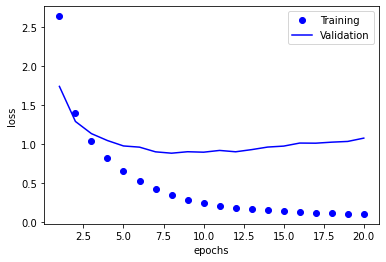

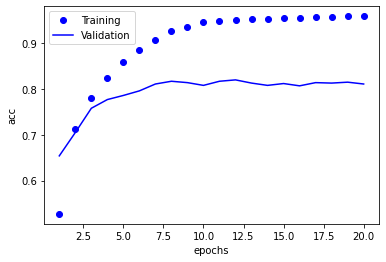

In [37]:
hist = history.history
print(hist.keys())
compareMetrics(hist, 'loss', 'val_loss', 'Training', 'Validation', 'epochs', 'loss')
compareMetrics(hist, 'accuracy', 'val_accuracy', 'Training', 'Validation', 'epochs', 'acc')